## Internship Task – Exploratory Data Analysis
This notebook performs EDA on the Titanic dataset to analyze factors affecting survival,
including gender, passenger class, age, and other numerical features.


In [ ]:
#Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#importing the dataset

df = pd.read_csv("train.csv")
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
#The overall look of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Summary statistics 
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


In [ ]:
#Checking for Null Values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handling Missing Values
- Filled Age with median value.
- Filled Embarked with mode (most frequent value).
- Dropped Cabin due to 77% missing values.


In [18]:
#there are missing values so lets fix that
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])



In [19]:
df.drop(columns='Cabin', inplace =True)

In [20]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#Lets groupby 

df.groupby('Sex')['Survived'].mean() 
df.groupby('Pclass')['Survived'].mean() 

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

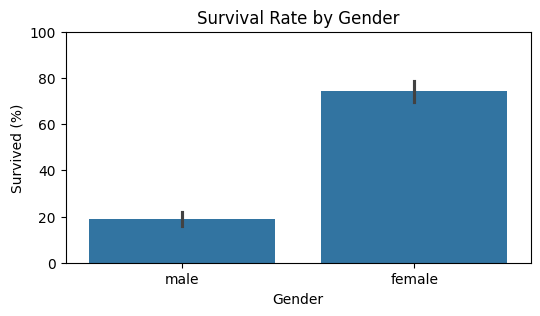

In [46]:
#Now we will create a bar plot that will represnt Survival by Gender
import seaborn as sns
plot_df = df.copy()
plot_df['Survived'] = plot_df['Survived'] * 100 # copy of the plotting 
plt.figure(figsize= (6, 3))
sns.barplot(x='Sex', y = 'Survived', data=plot_df)
plt.title('Survival Rate by Gender')
plt.xlabel("Gender")
plt.ylabel("Survived (%)")
plt.ylim(0, 100)
plt.show()

### Survival Rate by Gender
Females had a much higher survival rate than males, likely due to priority during evacuation.


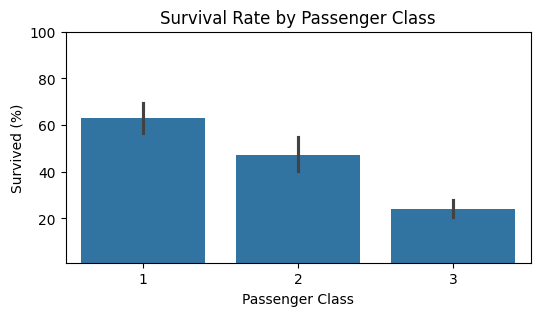

In [48]:
#Survial by Passenger class
plt.figure(figsize=(6, 3))

sns.barplot(x='Pclass', y='Survived', data=plot_df) 
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survived (%)')
plt.ylim(1, 100)
plt.show()

### Survival Rate by Passenger Class
1st class passengers had the highest survival rate, showing an impact of socio-economic status.


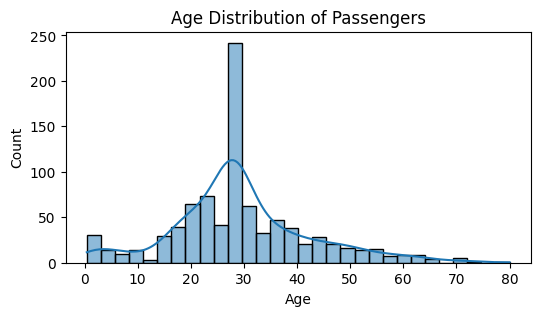

In [66]:
#Next we will make a histogram showing age Distribution 
plt.figure(figsize=(6, 3))
sns.histplot(data=df, x='Age', bins = 30, kde=True)
plt.title('Age Distribution of Passengers')
plt.show()

### Age Distribution
Passengers are mostly adults, but there are also many children and elderly passengers.


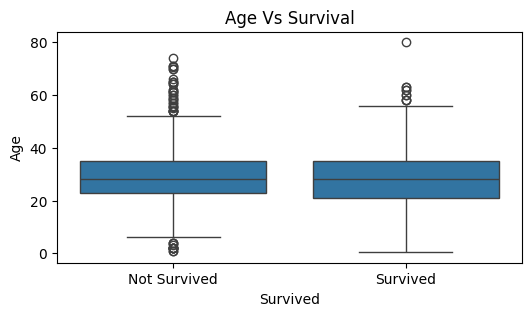

In [65]:
#Boxplot to show Age Vs Survival
plt.figure(figsize=(6, 3))
sns.boxplot(x='Survived', y='Age', data=df)
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.title("Age Vs Survival")
plt.show()

### Age vs Survival
Children show relatively higher survival compared to adults and seniors.


In [67]:
#Age Group

def age_group(age):
    if age < 13:
        return 'Child'
    elif age < 19:
        return 'Teen'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'
df['AgeGroup'] = df["Age"].apply(age_group)

df.groupby('AgeGroup')['Survived'].mean() * 100

AgeGroup
Adult     36.501377
Child     57.971014
Senior    26.923077
Teen      42.857143
Name: Survived, dtype: float64

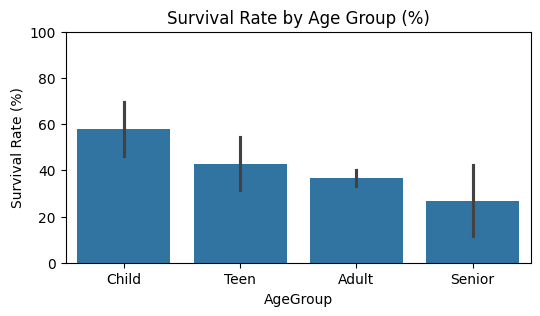

In [68]:
#plot for age group
plt.figure(figsize=(6, 3))
plot_df = df.copy()
plot_df['Survived'] = plot_df['Survived'] * 100  # Convert to %
sns.barplot(x='AgeGroup', y='Survived', data=plot_df,
            order=['Child', 'Teen', 'Adult', 'Senior'])
plt.title('Survival Rate by Age Group (%)')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.show()

### Survival by Age Group
Visualizing survival rates for Children, Teens, Adults, and Seniors highlights higher survival of children.


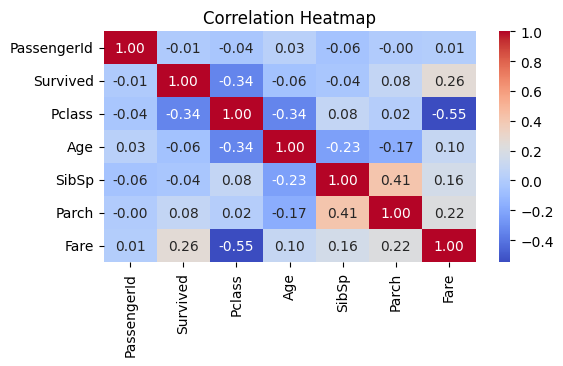

In [64]:
#Bonus Task Heatmap
plt.figure(figsize=(6, 3))
corr  = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt= ".2f")
plt.title('Correlation Heatmap')
plt.show()

### Correlation Heatmap
Shows relationships between numerical features and survival, e.g., negative correlation of Pclass with survival.


### Conclusion
- Women and children had higher survival rates.
- Socio-economic status (Pclass) significantly impacted survival chances.
- This analysis provides quick insights into survival patterns using barplots and heatmaps.
